In [1]:
import pandas as pd 
import numpy as np

👉 Extract the value at a certain timeunit (day, month, year, etc) from a SERIES of timestamp:
```python
        # Extract year, month, day
        date_series.dt.year
        date_series.dt.month
        date_series.dt.day

        # Extract hour, minute, second
        date_series.dt.hour
        date_series.dt.minute
        date_series.dt.second

        # Extract dayofweek, week, quarter
        date_series.dt.dayofweek
        date_series.dt.isocalendar().week
        date_series.dt.quarter

        # Extract year-month
        date_series.dt.to_period('M')
```

# B1

In [66]:
time_serie=pd.date_range(start='2024-01-01',end='2024-01-31')
oder_serie=np.random.randint(10,100,size=(len(time_serie)))
df=pd.DataFrame({'Date':time_serie,'Oders':oder_serie})
df['Week']=df['Date'].dt.isocalendar().week
df['Year']=df['Date'].dt.isocalendar().year
df[df['Year']==2024].groupby(['Week'])['Oders'].mean()[:10]

Week
1    56.428571
2    71.285714
3    54.285714
4    54.285714
5    58.666667
Name: Oders, dtype: float64

# B2

In [3]:
import matplotlib.pyplot as plt

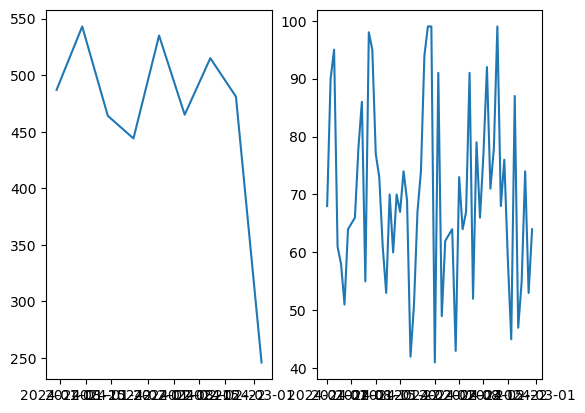

In [49]:
time_serie=pd.date_range(start='2024-01-01',end='2024-02-29')
access_serie=np.random.randint(40,100,len(time_serie))
df=pd.DataFrame({'Time':time_serie,'Amount access':access_serie})
df.set_index('Time',inplace=True)
df.resample('W').sum()
plt.subplot(121)
plt.plot(df.resample('W').sum())
plt.subplot(122)
plt.plot(df.resample('D').sum())

In [ ]:
time_serie=pd.date_range(start='2024-01-01',end='2024-02-29')
access_serie=np.random.randint(40,100,len(time_serie))
df=pd.DataFrame({'Time':time_serie,'Amount access':access_serie})
df['Iso Week']=df['Time'].dt.isocalendar().week
df['Iso Year']=df['Time'].dt.isocalendar().year
weekly_avg=round(df.groupby(['Iso Week','Iso Year'])['Amount access'].sum(),2)
weekly_avg

# B3

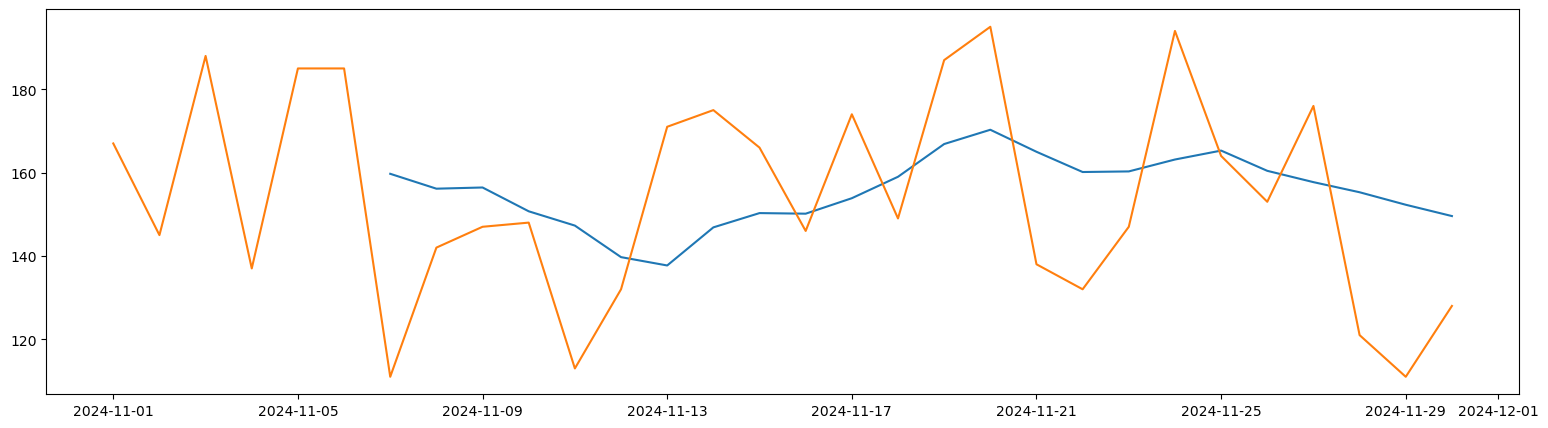

In [53]:
date_range = pd.date_range(start='2024-11-01', end='2024-11-30')
stock_prices = np.random.randint(100, 200, size=len(date_range))
df = pd.DataFrame({'Date': date_range, 'Stock_Price': stock_prices})
df['Moving_Avg_7d']=df['Stock_Price'].rolling(7).mean()
plt.figure(figsize=(19,5))
plt.plot(df['Date'],df['Moving_Avg_7d'])
plt.plot(df['Date'],df['Stock_Price'])

# B4

In [60]:
np.random.seed(0)
cus_id_serie=np.random.randint(1,101,100)
prod_cate_serie=np.random.choice(['Apple','Samsung','Xiaomi'],100)
quantities_serie=np.random.randint(1,10,100)
df=pd.DataFrame({
    'Cus_id':cus_id_serie,
    'Product':prod_cate_serie,
    'Quantity':quantities_serie
})
# pd.crosstab(
#     df['Cus_id'],df['Product'],
#     values=df['Quantity'],
#     margins=True, 
#     margins_name='Total',
#     aggfunc='sum'
# ).fillna(0)
pd.crosstab(
    df['Cus_id'],
    df['Product'],
    values=df['Quantity'],
    aggfunc=(['sum']),
    margins=True,
    margins_name='Total'
).fillna(0)

sum                     
Product  Apple Samsung Xiaomi Total
Cus_id                             
1          1.0     9.0    6.0    16
2          8.0     0.0    0.0     8
4          4.0     0.0    0.0     4
5          5.0     0.0    0.0     5
6          0.0     0.0    1.0     1
...        ...     ...    ...   ...
88         9.0     6.0    0.0    15
89         5.0    11.0    0.0    16
92         3.0     0.0    0.0     3
100        1.0     6.0    4.0    11
Total    160.0   165.0  186.0   511

[64 rows x 4 columns]

In [65]:
np.random.seed(0)
cus_id_serie=np.random.randint(1,101,100)
prod_cate_serie=np.random.choice(['Apple','Samsung','Xiaomi'],100)
quantities_serie=np.random.randint(1,10,100)
df=pd.DataFrame({
    'Cus_id':cus_id_serie,
    'Product':prod_cate_serie,
    'Quantity':quantities_serie
})
pd.pivot_table(
    data=df,
    index='Cus_id',
    columns='Product',
    values='Quantity',
    aggfunc=(['sum','mean']),
    margins=True,
    margins_name='Total'
).fillna(0)


sum                           mean                              
Product  Apple Samsung Xiaomi Total     Apple   Samsung    Xiaomi     Total
Cus_id                                                                     
1          1.0     9.0    6.0    16  1.000000  9.000000  6.000000  5.333333
2          8.0     0.0    0.0     8  8.000000  0.000000  0.000000  8.000000
4          4.0     0.0    0.0     4  4.000000  0.000000  0.000000  4.000000
5          5.0     0.0    0.0     5  5.000000  0.000000  0.000000  5.000000
6          0.0     0.0    1.0     1  0.000000  0.000000  1.000000  1.000000
...        ...     ...    ...   ...       ...       ...       ...       ...
88         9.0     6.0    0.0    15  9.000000  6.000000  0.000000  7.500000
89         5.0    11.0    0.0    16  2.500000  5.500000  0.000000  4.000000
92         3.0     0.0    0.0     3  3.000000  0.000000  0.000000  3.000000
100        1.0     6.0    4.0    11  1.000000  6.000000  4.000000  3.666667
Total    160.0   165.0  186.0   511  4.705882  5.322581  5.314286  5.110000

[64 rows x 8 columns]